# Formative 1

**Name: Paulius Rauba**

### Amazon Groceries and Gourmet Food

This dataset consists of reviews of fine groceries and gourmet food from Amazon. The whole dataset contains 233.1 million reviews written from May 1996 to Oct 2018. Reviews include product and user information, ratings, and a plaintext review.

In [1]:
import re
import json
import pickle
import random
import numpy as np
import pandas as pd

from html import unescape
from  matplotlib import pyplot as plt
from collections import Counter
from sklearn.manifold import TSNE
from scipy.spatial.distance import cosine
#from sklearn.feature_extraction import stop_words

pd.set_option('display.max_colwidth', -1)
pd.options.mode.chained_assignment = None

<ipython-input-1-12b43efc6fe8>:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
# Importing other libraries
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Paulius\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Part I: Dataframe and Dictionary Setup

**Step 1**: Download the zip package. Unzip it and use the code in the Jupyter Notebook to read the normalized text in the five sets of reviews into the dataframe.

In [3]:
food_reviews_path = r'.\food_reviews.json' # Change this to the relative path on your machine

# Load data into pandas dataframe
df = pd.read_json(food_reviews_path)

# Drop columns not needed
#df = df.drop(['image', 'reviewTime', 'verified', 'style'], axis=1)

In [6]:
df.head()

,summary,reviewerName,reviewText,reviewerID,verified,reviewTime,overall,category,unixReviewTime,asin,style,image,vote
0,Black Licorice Lovers Unite!,Pearl,"It's so difficult to find black licorice gum these days! I was so pleased when I seen that Amazon offered it. A box lasts me a long time. I do wish it was a bit fresher. Perhaps it's changed over the years, b/c when I was a youngster and bought this gum, it was soft/fresh, and the flavor lasted longer. Maybe b/c we are a small force it sits on the shelf longer, or the manufacturer has changed the recipe, it's tougher, and the flavor doesn't last quite as long as I would like, but nonetheless, am happy I was able to find this gum b/c it's my favorite!",A2ZNSZOJJXX3IE,True,"01 31, 2014",5,random,1391126400,B000EEK4OO,NaN,NaN,NaN
1,The taste is amazing plan and i do not need to add anything,EMP,I bought the unsweetened one from my local asia market. As for the comment above mine stating that it is loaded in cane sugars lol they all are if u choose a sugar diet. I drink mine plan or add real my own organic stevia -raw honey etc.. No matter what u buy its loaded with sugars lol lady above they make choices to go unsweetened. The taste is amazing plan and i do not need to add anything. Give it a try!,A13ZTRK1MFQ3ZS,False,"10 26, 2014",5,random,1414281600,B0046H2902,NaN,NaN,NaN
2,Delicious,Kimberly E. Hennessy,I love these Marzipans!! They are so good and nice and fresh! The dark chocolate is a perfect compliment to the marzipan.,A3EHMHTZDAIDP1,True,"03 26, 2013",5,random,1364256000,B000H27PB8,{'Flavor:': ' Marzipan inside'},NaN,NaN
3,"They were very expensive, but so worth it.",Alex Payne,"For awhile these things were selling for ~$14. $14! It's a crazy price for 8 Stroopwafels, but they're worth it. Thankfully, the prices have since come down but still look for the best deal you can get. They're too damn good to pass up.",A1YRYO2KX22SI,True,"12 2, 2016",4,random,1480636800,B00EF2MHF0,"{'Size:': ' 1 Pack', 'Flavor:': ' Caramel, Stroopwafel, Vanilla, Sweet'}",NaN,NaN
4,Amazing taste and they are definitely some of the best ...,Queso,Amazing taste and they are definitely some of the best beans I have had. Its a big pack that will last quite awhile and everyone with me marveled about how fresh it tasted. Its got a little hint of nut and has a very unique taste. You will be very happy with this purchase. I bought this at a discounted rate for my honest and unbiased review.,A1DDO8L2V1MA76,False,"07 18, 2016",5,random,1468800000,B01GEZSXJY,NaN,NaN,NaN


In [7]:
df[df.image.notnull()]

,summary,reviewerName,reviewText,reviewerID,verified,reviewTime,overall,category,unixReviewTime,asin,style,image,vote
5,"Sweet, moist and delicious crumb cakes!",JJCEO,"We picked some of these up at the local grocery store. They tasted great with a cup of coffee or tea. The cake was moist and sweet and fresh. The crumb topping was delicious and added to the great flavor. Each cake is 250 calories and contains 16 grams of sugar and 33 grams of carbohydrates. They are certainly not good for my diet but enjoyable as a treat.\n\nThey were a lot less expensive at the local store, like 1/4th the price but of course there is no shipping. I posted some photos of the nutrition label and of the box. Just remember, this is for 6 cakes in one box and you only get one box.\n\nThey are a good product and I rate them at 5 stars but you should shop around because of the price.",A1X1CEGHTHMBL1,False,"07 12, 2015",5,random,1436659200,B00O7OEIFS,NaN,"[https://images-na.ssl-images-amazon.com/images/I/51S3yC5HZLL._SY88.jpg, https://images-na.ssl-images-amazon.com/images/I/415NbFL9omL._SY88.jpg, https://images-na.ssl-images-amazon.com/images/I/41yYmSNVUlL._SY88.jpg]",NaN
88,Finger licking good in a salad!,Marina Ruder,"I've purchased from this seller before, which is why I purchased this trio this time. I enjoyed the fish before and this time. This time I decided to weight all the bags to see if the weight was accurate and it sure was. I've really enjoyed all 3 packets. I even had my 18 month old taste the fish too and he loved most of it. The only one he wasn't crazy about was the peppered one but the parents had no problem devouring it! I also really liked how the salmon packs arrived with 2 recipes. I looked at the receipt and created my own out of that. These packs were perfect for a salad I made over and over. I used one pack of salmon mixed it with mushed avocado, sliced cucumbers, red onion, kale and some dill. Absolutely delicious and I highly recommend this product! I plan on ordering more soon. Great for nursing moms!!\n\nI received this product with a discount in exchange for my honest and unbiased opinion.",A2M9KKPAC2477E,False,"06 20, 2016",5,random,1466380800,B00OICS42W,NaN,"[https://images-na.ssl-images-amazon.com/images/I/81EcA8eWGxL._SY88.jpg, https://images-na.ssl-images-amazon.com/images/I/81ughLJ8S6L._SY88.jpg, https://images-na.ssl-images-amazon.com/images/I/71pkKoFi5QL._SY88.jpg, https://images-na.ssl-images-amazon.com/images/I/8169ZQYSSlL._SY88.jpg, https://images-na.ssl-images-amazon.com/images/I/71EMVBSQ4iL._SY88.jpg, https://images-na.ssl-images-amazon.com/images/I/71XQlQ93hVL._SY88.jpg, https://images-na.ssl-images-amazon.com/images/I/71Y4DXhPe9L._SY88.jpg]",2
123,"Seashell in Bucket, Otherwise a Delicious Alternative to Nordur",Ocean,"UPDATE: Second bucket we've ordered, towards the bottom found a 1/2 inch (1cm) wide chunk of dirty and hard material, possibly a seashell (see photos). Luckily we didn't bite it. Poor quality control on an otherwise pristine product. Now I'm nervous about future orders; the last thing I want to do is put something hard in our food that could damage our teeth.\n\nEarlier REVIEW:\nWe fell in love with Nordur salt from Iceland. The local butcher was giving out little packets. We wanted more... but it only comes in 250g packages online. We wanted MORE. Enter Maldon... the salt from England that's in many ways similar to Nordur. It's not made with geothermal heat like Nordur, but it's big crunchy crystals and a very neutral pleasant taste. We put it on everything, and appreciate being able to buy it in these larger tubs!",A11OCL6ATQJBB5,True,"04 20, 2018",3,random,1524182400,B004SBQYMU,{'Size:': ' 3.3 lb bucket'},"[https://images-na.ssl-images-amazon.com/images/I/61U+WvKYHtL._SY88.jpg, https://images-na.ssl-images-amazon.com/images/I/61HpfARQSXL._SY88.jpg, https://images-na.ssl-images-amazon.com/images/I/71xp1y6nMzL._SY88.jpg, https://images-na.ssl-images-amazon.com/images/I/7152wPAVNjL._SY88.jp

In [6]:
# Define function to clean text
def clean(text):
    text = unescape(text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = ' '.join([w.lower() for w in text.split()])
    return text

In [7]:
# Create column with cleaned text
df['cleaned_text'] = df.reviewText.map(lambda x: clean(x))

In [8]:
# Check number of product categories
print(Counter(df['category']))

Counter({'random': 10000, 'tea': 10000, 'chocolate': 10000, 'pasta': 10000, 'coffee': 10000})


**Step 2**: Use the code provided in the Jupyter Notebook to load the pretrained word embeddings.

In [9]:
vectors_path = './fasttext_vectors.p' # Change this to the relative path on your machine

with open(vectors_path, 'rb') as f:
    vectors = pickle.load(f)

In [10]:
# Print number of embeddings and embedding dimension
print(len(vectors), len(vectors['hello']))

26399 300


In [11]:
print('HOORAY! I AM ALL SET UP AND READY TO COMPLETE THIS FORMATIVE BY TUESDAY AT 11.59 AM GMT!')

HOORAY! I AM ALL SET UP AND READY TO COMPLETE THIS FORMATIVE BY TUESDAY AT 11.59 AM GMT!


**Step 3**: Create dictionaries of the vocabularies for the target categories that we will be working on (INSTANT-COFFEE, BLACK-TEA, CHOCOLATE, PASTA) as well as the RANDOM set. The keys of each dictionary should be the vocabulary items, and the corresponding values should be their frequencies. A convenient way to create the dictionaries is to use the ``Counter`` class from the ``collections`` library. Remove all words on the stopword list from all of the dictionaries. Also remove all the words for which no embedding exists. Now your dictionaries contain only words that may be relevant to the semantic relationships amongst the topics, and that have embeddings.

In [12]:
print('Number of words in stopwords list:', len(stopWords))
print('10 words on the stopwords list:', list(stopWords)[:10])

# Add 't' and 's' to list of stopwords (effect of cleaning function)
stops = list(stopWords) + ['t', 's']

Number of words in stopwords list: 179
10 words on the stopwords list: ["you'll", 'him', 'just', 'any', 'who', "haven't", 'your', 'couldn', 'be', 'no']


In [14]:
def get_dictionary(category, df=df, vectors=vectors):
    """
    Get all words in a dictionary and filter out only relevant ones
    """
    print(f"\nGetting values for category {category}")
    
    # Get all the words in the dictionary
    categories_np = df.loc[df.category == category, 'cleaned_text'].str.split(' ').to_numpy()
    dict_words = Counter([item for sublist in categories_np for item in sublist])
    print(f"Number of words initially: {len(dict_words.keys())}")
    
    # Get only used words (in the word embeddings & stop words)
    common_words = set(dict_words.keys()).intersection(vectors.keys())
    common_words_filtered = [x for x in common_words if x not in stops]
    dict_final = {k:dict_words[k] for k in common_words_filtered}
    print(f"Number of words after filtering: {len(dict_final.keys())}")
    
    return dict_final

In [15]:
tea = get_dictionary('tea')
choc = get_dictionary('chocolate')
pasta = get_dictionary('pasta')
coffee = get_dictionary('coffee')


Getting values for category tea
Number of words initially: 13998
Number of words after filtering: 12468

Getting values for category chocolate
Number of words initially: 15081
Number of words after filtering: 13318

Getting values for category pasta
Number of words initially: 13912
Number of words after filtering: 12247

Getting values for category coffee
Number of words initially: 13693
Number of words after filtering: 12167


In [16]:
random_category = get_dictionary('random')


Getting values for category random
Number of words initially: 16569
Number of words after filtering: 14491


### Part II: Cosine Similarity of Words

**Step 1**: Retrieve the embeddings for the words _coffee_, _tea_, _chocolate_, and _pasta_ from the word embeddings. Also take a random sample of 200 words from the word embeddings.

In [17]:
from sklearn.manifold import TSNE

In [18]:
words_main = ['coffee', 'tea', 'chocolate', 'pasta']
random_words = {x: vectors[x] for x in random.sample(vectors.keys(), 200)}
four_words = {x:vectors[x] for x in words_main}

all_words = four_words.copy()
# Update with keywords
all_words.update(random_words)

**Step 2**: Make a t-SNE plot in which the random words are all plotted as dots, and the points for the target words are plotted as c (_coffee_), t (_tea_), h (_chocolate_), and p (_pasta_). 

In [19]:
import seaborn as sns

In [20]:
tsne = TSNE(n_components = 2, random_state=0, n_jobs=-1, perplexity = 50)

# Get word arrays
words_arr = np.array([np.array(all_words[x]) for x in all_words.keys()])
name_words = [x if x in words_main else 'other' for x in all_words.keys()]

# Fit transform
tsne_res = tsne.fit_transform(words_arr)

In [21]:
def get_tsne_plot(tsne_res, y):
    """
    Plot the t-distributed stochastic neighbor embeddings.
    """
    fig, ax = plt.subplots(figsize=(13,6))
    sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = y, legend = 'full', alpha = 0.9)
    ax.set_title('T-SNE distribution of the transformed Amazon review dataset');

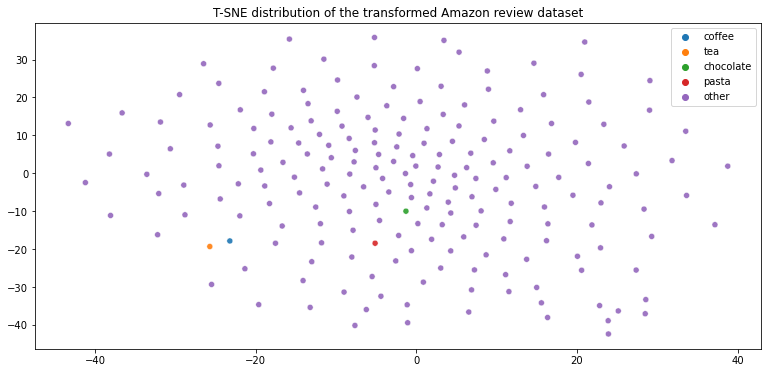

In [22]:
get_tsne_plot(tsne_res, name_words)

**Step 3**: For each of the four target words, find its cosine similarity to itself, the three other words, and all of the randomly selected words. Rank the random words by their similarity to the target word. Now make a table with 4 rows and 7 columns. The 4 rows are the four target words. The seven columns are:
- the four target words;
- the similarity for the word falling at the 5-th percentile in the comparison to random words;
- the average similarity of the given target word to the random words;
- the similarity for the word falling at the 95-th percentile in the comparison to random words.

#### Ranking words by similarity

In [23]:
words_df = pd.DataFrame(all_words)

In [24]:
def get_cosine_scores(words_main=words_main, words_df=words_df):
    """
    Gets the cosine scores of the four selected words
    """
    cos_dict = {}

    # Loop over the four words
    for word in words_main:

        # Get its vector
        word_vector = words_df[word]
        cosine_similarity = []

        # Loop over all the other words and append the cosine score
        for col in words_df.columns:
            new_word_vector = words_df[col]
            cos_score = 1 - cosine(word_vector, new_word_vector)
            cosine_similarity.append(cos_score)

        cos_dict[word] = cosine_similarity
        
    cos_sim = pd.DataFrame(cos_dict)
    cos_sim.index = words_df.columns
    
    return cos_sim

In [25]:
cos_sim = get_cosine_scores()
for word in words_main:
    print(f"\nWords closest to {word}")
    display(cos_sim[[word]].sort_values(by=word, ascending=False))


Words closest to coffee


,coffee
coffee,1.000000
tea,0.758462
chocolate,0.630488
beer,0.629367
brewed,0.514763
...,...
jif,0.064861
hb,-0.003727
grd,-0.105537
pmk,-0.119636



Words closest to tea


,tea
tea,1.000000
coffee,0.758462
beer,0.548642
chocolate,0.528839
brewed,0.505344
...,...
jif,0.046239
hb,0.031498
grd,-0.066161
pmk,-0.107277



Words closest to chocolate


,chocolate
chocolate,1.000000
chocolatiers,0.667275
coffee,0.630488
brownies,0.589815
beer,0.536455
...,...
jif,0.059468
hb,-0.051427
pmk,-0.125793
grd,-0.150635



Words closest to pasta


,pasta
pasta,1.000000
pierogi,0.533669
chocolate,0.498289
salsa,0.486788
crullers,0.463630
...,...
czar,0.076435
hb,0.059148
pmk,-0.059533
osr,-0.071436


#### Making the table

In [26]:
# Getting only the target words
cos_sim_target = cos_sim[cos_sim.index.isin(words_main)].copy()

# Removing the cosine similarities for the target words
cos_sim_random = cos_sim[~cos_sim.index.isin(words_main)].copy()

In [27]:
def get_metrics_for_words(words_main=words_main, cos_sim_random=cos_sim_random):
    """
    Gets the mean, 5th percentile and 95th percentile scores for the words
    """
    values_dict = {}
    for value in words_main:

        # Create a dictionary
        values_dict[value] = {}

        # Get values
        values = cos_sim_random[value].sort_values(ascending=False)
        perc_five = np.percentile(values, 5)
        avg = np.mean(values)
        perc_ninetyfive = np.percentile(values, 95)

        # Assign
        values_dict[value]['five_percentile'] = perc_five
        values_dict[value]['average'] = perc_five
        values_dict[value]['ninetyfive_perc'] = perc_ninetyfive
        
    return pd.DataFrame(values_dict).transpose()

In [28]:
temp_df = get_metrics_for_words()
results_df = pd.concat([cos_sim_target, temp_df], axis = 1)

In [29]:
results_df

,coffee,tea,chocolate,pasta,five_percentile,average,ninetyfive_perc
coffee,1.000000,0.758462,0.630488,0.430295,0.145381,0.145381,0.433891
tea,0.758462,1.000000,0.528839,0.377048,0.133199,0.133199,0.409941
chocolate,0.630488,0.528839,1.000000,0.498289,0.163156,0.163156,0.461296
pasta,0.430295,0.377048,0.498289,1.000000,0.147232,0.147232,0.407575


### Part II: Nearest Neighbors of Words

**Step 1**: Write Python code to find the 20 nearest neighbors of the probe words _coffee_, _tea_, _chocolate_, _pasta_. That is, for each target word, find its cosine distance to each of the words in the embeddings list. Rank these distances, and then find the 20 most similar words (excluding the similarity of the word to itself). Organize the nearest neighbors in a table ranked by how similar they are to the probe word (most similar at the top). 

In [30]:
def get_total_distances_all_words(words_main=words_main, vectors=vectors):
    """
    Get total distances between the four probe words and all the word embeddings
    """
    distances_total = {}
    for word in words_main:
        word_array = np.array(words_df[word])
        distances_word = {}
        for k, v in vectors.items():
            dist = 1 - cosine(word_array, v)
            distances_word[k] = dist
        distances_total[word] = distances_word
        
    return pd.DataFrame(distances_total)

In [31]:
distances_df = get_total_distances_all_words()

In [32]:
def get_top_words(df, n_words=21, words_main=words_main):
    """
    Get the top words of each dataframe
    """
    words = {}
    for word in words_main:
        top_words = list(df[word].sort_values(ascending=False)[1:n_words].index)
        words[word] = top_words
        
        first_word = list(df[word].sort_values(ascending=False).index)[0]
        assert first_word == word, 'first word is not itself'
    
    return pd.DataFrame(words)

#### Top words for all the word embeddings

In [33]:
top_words_total = get_top_words(distances_df)

In [34]:
top_words_total

,coffee,tea,chocolate,pasta
0,coffees,coffee,chocolates,spaghetti
1,coffeee,teas,chocolatey,pastas
2,tea,cuppa,chocolately,ravioli
3,coffe,teabags,chocolaty,carbonara
4,cappuccino,teabag,chocolaterie,ziti
5,decaf,cuppas,chocolat,gnocchi
6,cofee,cupper,cocoa,lasagna
7,coffeeshop,coffe,choco,macaroni
8,cappuccinos,coffees,praline,marinara
9,cocoa,rooibos,candy,spaghettini


#### Top words for the subset of words

In [35]:
top_words = get_top_words(cos_sim)
top_words

,coffee,tea,chocolate,pasta
0,tea,coffee,chocolatiers,pierogi
1,chocolate,beer,coffee,chocolate
2,beer,chocolate,brownies,salsa
3,brewed,brewed,beer,crullers
4,crullers,camellia,tea,taro
5,brownies,brownies,margerine,shoyu
6,bodegas,crullers,crullers,margerine
7,chocolatiers,pringles,pringles,coffee
8,margerine,mornay,pasta,quesadillas
9,pringles,poisons,fruitiness,leche


They are semantically similar, but there are also cases where they are semantically associated or related. Roastery is not semantically similar but related.

### Part III: A Quick Detour on Topics

**Step 1**: For each of the four target data sets, plus the RANDOM data set, rank the words in the dictionary from most frequent to least frequent, and store the results. Now generate 4 Zipfian rank-frequency plots, in which the log rank of a word appears on the x axis and the log frequency appears on the y axis. To repeat: this plot should be on a log-log scale. Superimpose on each plot the rank-frequency curve for the RANDOM dataset. 

In [36]:
def get_zipf_data(tea):
    """
    Get zipfs curve for any of the word frequency distributions
    """
    tea_df = pd.DataFrame(pd.Series(tea).sort_values(ascending=False))
    tea_df.columns = ['frequency']
    tea_df['frequency_log'] = np.log(tea_df['frequency'])
    tea_df['rank'] = range(1,len(tea_df) + 1)
    tea_df['rank_log'] = np.log(tea_df['rank'])
    
    return tea_df

In [37]:
def get_zipf_curve(tea, word, random_category=random_category):
    """
    Get zipfs curve for any of the word frequency distributions
    """
    tea_df = get_zipf_data(tea)
        
    fig, ax = plt.subplots(1,1, figsize = (8,7))
    
    sns.lineplot(data=tea_df, x = 'rank_log', y = 'frequency_log', label = word)
    if random_category is not None:
        random_df = get_zipf_data(random_category)
        sns.lineplot(data=random_df, x = 'rank_log', y = 'frequency_log', label = 'Random')

    ax.set_title(f"Zipf's curve for reviews on {word}")

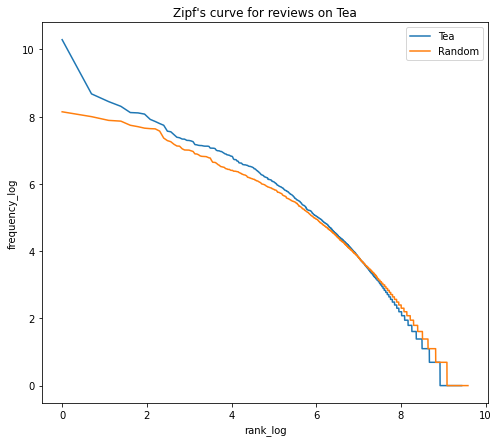

In [38]:
get_zipf_curve(tea, 'Tea')

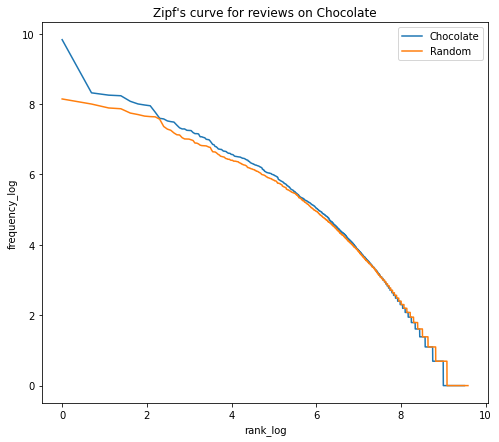

In [39]:
get_zipf_curve(choc, 'Chocolate')

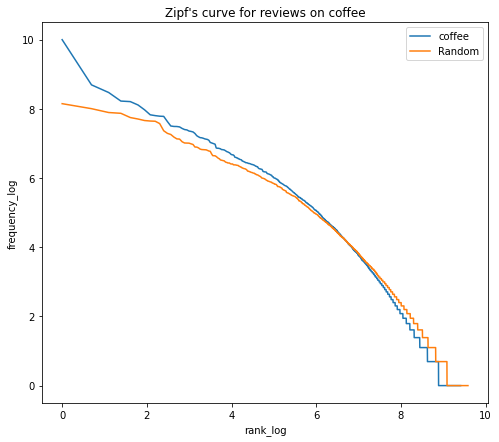

In [40]:
get_zipf_curve(coffee, 'coffee')

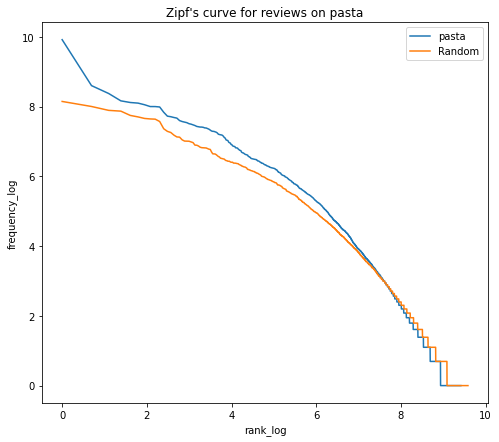

In [41]:
get_zipf_curve(pasta, 'pasta')

**Step 2**: Now normalize your rank-frequency distributions so that they represent probabilities rather than counts.

In [65]:
def normalize(var):
    """
    Normalize a rank frequency distribution
    """
    total_sum = np.array([x for x in var.values()]).sum()
    return {k:v/total_sum for k,v in var.items()}

In [68]:
tea_n = normalize(tea)
choc_n = normalize(choc)
coffee_n = normalize(coffee)
pasta_n = normalize(pasta)
random_category_n = normalize(random_category)

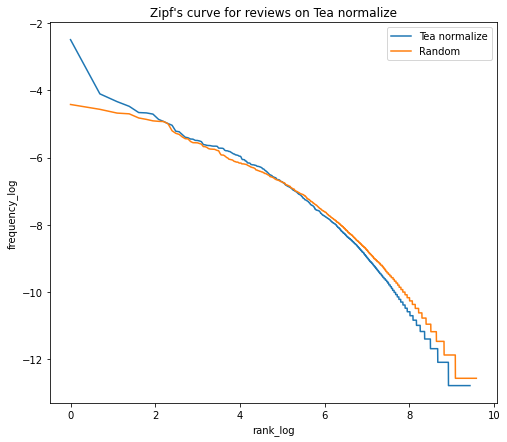

In [70]:
get_zipf_curve(tea_n, 'Tea normalize', random_category_n)

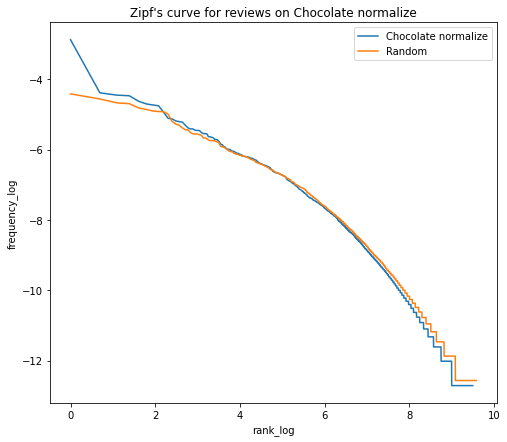

In [72]:
get_zipf_curve(choc_n, 'Chocolate normalize', random_category_n)

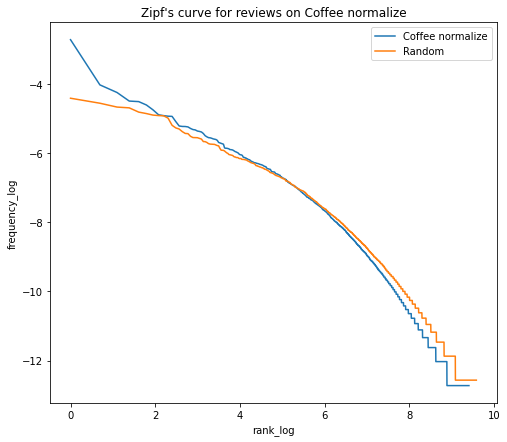

In [73]:
get_zipf_curve(coffee_n, 'Coffee normalize', random_category_n)

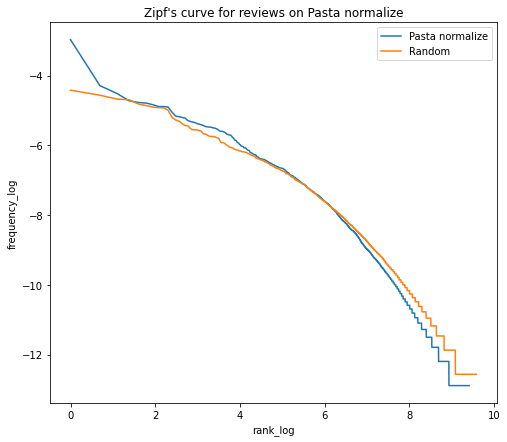

In [74]:
get_zipf_curve(pasta_n, 'Pasta normalize', random_category_n)

**Step 3**: Compute the cross-entropy between R and T, for all T. Print the numbers clearly labelled by which target T is being compared to R

In [83]:
from math import log2

In [84]:
def cross_entropy(p, q):
    """
    Calculate the cross-entropy between two probability distributions
    """
    return -sum([p[i]*log2(q[i]) for i in range(len(p))])

In [103]:
def get_cross_entropy(tea_n, label, random_category_n=random_category_n):
    """
    Get cross entropy for the two probability distiributions
    """
    tea_set = set(tea_n.keys())
    random_set = set(random_category_n.keys())
    common_keys = tea_set.intersection(random_set)
    random_dist = np.array([random_category_n[x] for x in common_keys])
    tea_dist = np.array([tea_n[x] for x in common_keys])
    print(f"The cross-entropy difference between {label} and the random distribution is: {cross_entropy(tea_dist, random_dist)}")

In [106]:
target_dict = {'tea': tea_n,
               'chocolate': choc_n,
               'coffee': coffee_n,
               'pasta': pasta_n}

for label, var in target_dict.items():
    get_cross_entropy(var, label)

The cross-entropy difference between tea and the random distribution is: 10.376304989133121
The cross-entropy difference between chocolate and the random distribution is: 10.56225912978873
The cross-entropy difference between coffee and the random distribution is: 10.34119424800041
The cross-entropy difference between pasta and the random distribution is: 10.762670937216894


### Part IV: Similarity of Topics

**Step 1**: Compute the Jaccard similarities amongst all four target topics (INSTANT-COFFEE, BLACK-TEA, CHOCOLATE, and PASTA) by taking the intersections of the dictionaries that you have set up (more specifically, the intersections and unions of their keys). Also, find the Jaccard similarity of each target topic to the RANDOM set. Create a 4 by 5 table, where the rows are the target topics; the columns are the target topics, plus RANDOM; and the entries are the Jaccard similarity.

In [434]:
def jac_similarity(l1, l2):
    """
    Get the Jaccard similarity of two lists
    """
    l1 = set(l1)
    l2 = set(l2)
    inters = l1.intersection(l2)
    union = l1.union(l2)
    
    sim_measure = len(inters) / len(union)
    
    return sim_measure

In [457]:
dict_values = {'tea': tea,
               'chocolate': choc,
               'pasta': pasta,
               'coffee': coffee,
               'random': random_category}

def get_jac_table(dict_values):
    jac_dict = {}

    for k1, v1 in dict_values.items():
        jac_dict[k1] = {}
        for k2, v2 in dict_values.items():
            if k1 != k2:
                jac_dict[k1][k2] = jac_similarity(v1, v2)
                
    return pd.DataFrame(jac_dict).drop('random')

In [459]:
df_jac = get_jac_table(dict_values)
df_jac

,tea,chocolate,pasta,coffee,random
chocolate,0.455274,NaN,0.434946,0.445957,0.460557
pasta,0.429522,0.434946,NaN,0.431822,0.453389
coffee,0.456486,0.445957,0.431822,NaN,0.447860
tea,NaN,0.455274,0.429522,0.456486,0.451281


**Step 2**:  Loop over all reviews in each of the target product categories and determine
an embedding for each review. Using only the embeddings for words that appear in
your dictionary, average the word embedding vectors for the words in the text of the
review. Do two things with these embeddings:
- aggregate (sum) the embeddings to produce a vector for each product category: INSTANT-COFFEE, BLACK-TEA, CHOCOLATE, PASTA, and RANDOM;
- make a table with 4 rows and 5 columns, just like you made in Step 1.

Remove stop words (!)

In [517]:
from functools import lru_cache

In [562]:
@lru_cache()
def get_word(word, vectors=vectors):
    return vectors.get(word)

In [572]:
# This is not very efficient, but I'll leave it for the meantime.
def get_avg_embedding(ls):
    """
    Get average embedding from a list
    """
    words = []
    for word in ls:
        if get_word(word) is not None:
            words.append(get_word(word))
    return np.mean(words, axis=0)

In [574]:
# Getting the embeddings for all reviews
df['review_list'] = df['cleaned_text'].str.split(' ')
df['review_embedding'] = df['review_list'].map(get_avg_embedding)
assert df['review_embedding'].map(len).mean() == 300, 'Not all entries have a length of 300'

Aggregating the embeddings

In [623]:
df['review_embedding'] = df['review_embedding'].map(lambda x: np.array(x))
words_main.append('random')

In [625]:
dict_embed = {}
for word in words_main:
    agg_embed = df.loc[df.category == word, 'review_embedding'].sum()
    dict_embed[word] = agg_embed

In [632]:
def get_cos_table(dict_values):
    """
    Get the cosine similarity of the embeddings
    """
    cos_dict = {}

    for k1, v1 in dict_values.items():
        cos_dict[k1] = {}
        for k2, v2 in dict_values.items():
            if k1 != k2:
                cos_dict[k1][k2] = 1 - cosine(v1, v2)
                
    return pd.DataFrame(cos_dict).drop('random')

In [633]:
cos_df_embed = get_cos_table(dict_embed)
cos_df_embed

,coffee,tea,chocolate,pasta,random
tea,0.995493,NaN,0.993088,0.991191,0.995062
chocolate,0.995542,0.993088,NaN,0.997198,0.998693
pasta,0.994381,0.991191,0.997198,NaN,0.997847
coffee,NaN,0.995493,0.995542,0.994381,0.998229


**Step 3**: Also take a random sample of 1000 embeddings in each category. Make a t-SNE plot of the sampling of embeddings, using the following colour scheme: green (INSTANT-COFFEE); red (BLACK-TEA); orange(CHOCOLATE); blue (PASTA); grey (RANDOM).

In [641]:
df_sample = df.groupby('category').apply(lambda x: x.sample(1000))
tsne = TSNE(n_components = 2, random_state=0, n_jobs=-1, perplexity = 50)

In [645]:
words_arr = np.array([np.array(x) for x in df_sample['review_embedding']])
name_words = np.array(df_sample['category'])

# Fit transform
tsne_res = tsne.fit_transform(words_arr)

In [687]:
def get_tsne_plot(tsne_res, y):
    """
    Plot the t-distributed stochastic neighbor embeddings.
    """
    colors = {'coffee': 'green',
              'tea': 'red',
              'chocolate': 'orange',
              'pasta': 'blue',
              'random': 'grey'}
    
    fig, ax = plt.subplots(figsize=(13,6))
    sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = y, legend = 'full', alpha = 0.5)
    #ax.scatter(x = tsne_res[:,0], y = tsne_res[:,1], c = pd.Series(y).map(colors), alpha = 0.2)
    ax.set_title('T-SNE distribution of the embeddings of Amazon reviews')
    ax.legend()

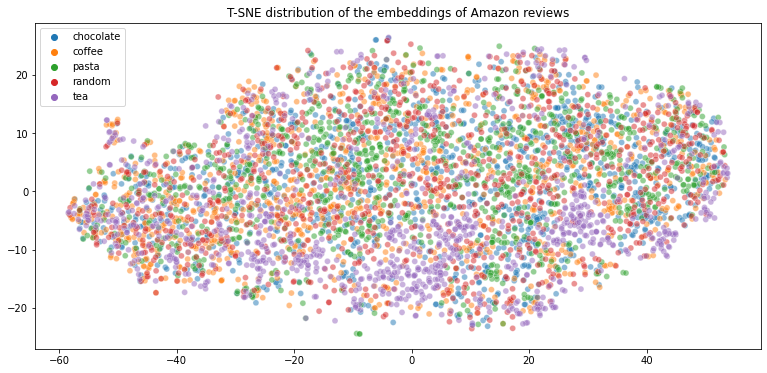

In [688]:
get_tsne_plot(tsne_res, name_words)

**Step 4**: Consider the topic pair INSTANT-COFFEE and CHOCOLATE. Retrieve the following sets of words:
- ONLY-CHOCOLATE (words occurring in CHOCOLATE but not INSTANT-COFFEE);
- ONLY-INSTANT-COFFEE (words occurring only in INSTANT-COFFEE but not CHOCOLATE);
- INSTANT-COFFEE $\cup$ CHOCOLATE (words occurring in both INSTANT-COFFEE and CHOCOLATE).

Use the frequency information for these sets to comment on the conjecture. 

In [716]:
only_coffee = np.setdiff1d(list(coffee.keys()), list(choc.keys()))
only_choc =  np.setdiff1d(list(choc.keys()), list(coffee.keys()))
both_sets = set(coffee.keys()).intersection(choc.keys())
assert len(set(only_coffee).intersection(set(only_choc))) == 0, 'Sets have the same words'

In [740]:
def get_top_items(only_coffee, coffee, n=15):
    """
    Print out top items for the given dataframe
    """
    only_coffee_dict = {}
    for item in only_coffee:
        only_coffee_dict[item] = coffee[item]
    return pd.Series(only_coffee_dict).sort_values(ascending=False)[0:n]

Separate sets

In [741]:
# Only coffee
get_top_items(only_coffee, coffee)

brewed           890
decaf            735
maxwell          180
mount            175
mornings         135
kava             116
starbuck         113
decaffeinated    108
jitters          98 
mane             97 
columbian        91 
instants         85 
clasico          83 
maxim            82 
boil             78 
dtype: int64

In [742]:
# Only chocolate
get_top_items(only_choc, choc)

almonds       414
squares       327
cadbury       263
dove          216
reese         172
peanuts       172
waxy          167
snickers      153
ritter        148
marzipan      142
kat           126
endangered    122
crispy        114
nougat        105
bark          99 
dtype: int64

Common sets

In [744]:
# Words in both, frequencies in coffee
get_top_items(both_sets, coffee)

coffee       21935
instant      5941 
like         4764 
good         3721 
taste        3663 
cup          3322 
great        2890 
love         2502 
flavor       2443 
product      2404 
one          2390 
drink        2058 
starbucks    1811 
get          1787 
water        1784 
dtype: int64

In [745]:
# Words in both, frequencies in chocolate
get_top_items(both_sets, choc)

chocolate     18610
dark          4107 
like          3846 
bar           3781 
good          3227 
bars          2995 
one           2907 
taste         2844 
love          2369 
great         1991 
milk          1956 
candy         1848 
flavor        1812 
would         1789 
chocolates    1640 
dtype: int64

In terms of the words that appear in only one of the two sets, they are both very subject specific, either because of different types of chocolate or coffee, or because of other vocabulary related to that word (e.g. kava meaning coffee in other languages or drinks similar to coffee elsewhere). The words that appear in both sets have different frequencies for both sets. For coffee, words such as 'coffee' or 'instant' ar dominated. These are much more likely to be used in coffee, yet also appear in the chocolate category. The opposite is true for chocolate with words such as 'choolate' or 'dark'.